In [15]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import mylib as lib
pd.set_option('display.float_format', lambda x: '%.3f' % x)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
assets = ["Steel", "Fin"]
returns = lib.readcsv('data\ind30_m_vw_rets.csv')
returns.columns = returns.columns.str.strip()
returns = returns[assets]

size = lib.readcsv('data\ind30_m_size.csv', percentage = False)
size.columns = size.columns.str.strip()
size = size[assets]

firms = lib.readcsv('data\ind30_m_nfirms.csv', percentage = False)
firms.columns = firms.columns.str.strip()
firms = firms[assets]

In [17]:
marketsize_by_industry = size * firms

In [18]:
total_marketsize = marketsize_by_industry.sum(axis="columns")

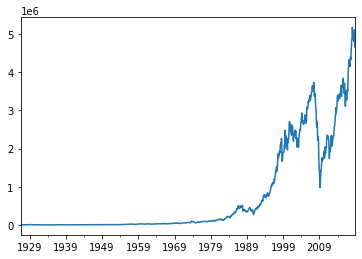

In [19]:
total_marketsize.plot()

In [20]:
capweight_by_industry = marketsize_by_industry.divide(total_marketsize, axis="rows")

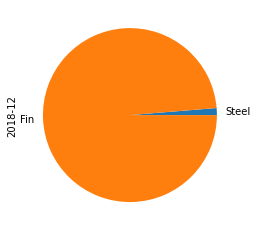

In [21]:
n = capweight_by_industry.shape[0]
capweight_by_industry.iloc[n-1].plot.pie()

In [22]:
#capweight_by_industry[["Fin", "Smoke", "Telcm"]].plot()

In [23]:
total_market_return = (capweight_by_industry * returns).sum(axis="columns")

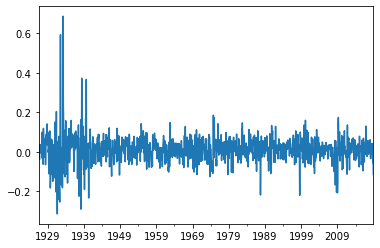

In [43]:
total_market_return.plot()

In [25]:
total_market_index = lib.drawdown(total_market_return).Wealth

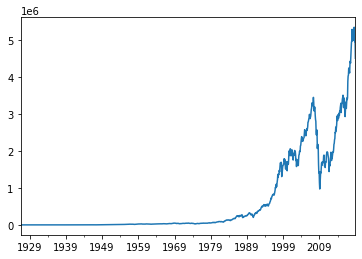

In [26]:
total_market_index.plot()

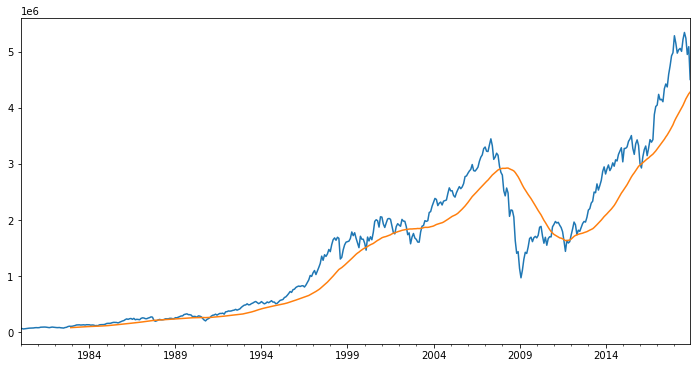

In [27]:
total_market_index["1980":].plot(figsize=(12,6))
total_market_index["1980":].rolling(window=36).mean().plot()

In [28]:
timeseries_36m_corr = returns.rolling(window=36).corr()
timeseries_36m_corr

Steel   Fin
1926-07 Steel    nan   nan
        Fin      nan   nan
1926-08 Steel    nan   nan
        Fin      nan   nan
1926-09 Steel    nan   nan
...              ...   ...
2018-10 Fin    0.595 1.000
2018-11 Steel  1.000 0.587
        Fin    0.587 1.000
2018-12 Steel  1.000 0.643
        Fin    0.643 1.000

[2220 rows x 2 columns]

In [29]:
timeseries_36m_corr.index.names = ["date","industry"]
timeseries_36m_corr.tail()

Steel   Fin
date    industry             
2018-10 Fin       0.595 1.000
2018-11 Steel     1.000 0.587
        Fin       0.587 1.000
2018-12 Steel     1.000 0.643
        Fin       0.643 1.000

In [40]:
trailing_36m_corr_group = timeseries_36m_corr.groupby(level="date")
trailing_36m_corr_group.tail()

Steel   Fin
date    industry             
2018-08 Steel     1.000 0.584
        Fin       0.584 1.000
2018-09 Steel     1.000 0.565
        Fin       0.565 1.000
2018-10 Steel     1.000 0.595
        Fin       0.595 1.000
2018-11 Steel     1.000 0.587
        Fin       0.587 1.000
2018-12 Steel     1.000 0.643
        Fin       0.643 1.000

In [41]:
trailing_36m_corr = trailing_36m_corr_group.apply(lambda cormat: cormat.values.mean())
trailing_36m_corr.tail()

industry
Fin     nan
Steel   nan
dtype: float64

In [32]:
trailing_annualized_total_market_return = total_market_return.rolling(window=36).aggregate(lib.annualized_return)

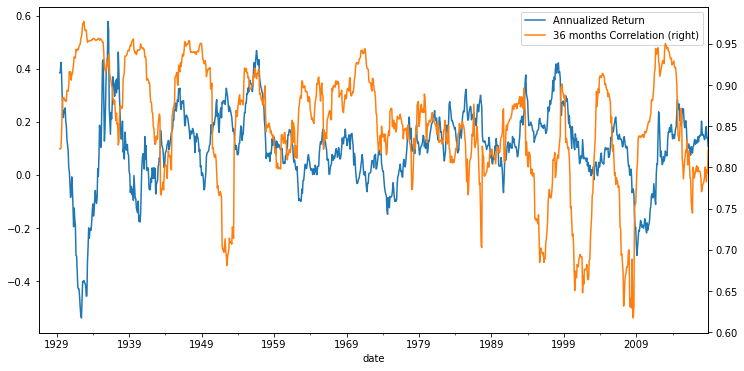

In [33]:
trailing_annualized_total_market_return.plot(figsize=(12,6), legend=True, label="Annualized Return")
trailing_36m_corr.plot(label="36 months Correlation", legend=True, secondary_y=True)

In [34]:
trailing_annualized_total_market_return.corr(trailing_36m_corr)

-0.2076070986538907